# Challenge Set 7
## Hasan Haq

Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [33]:
df_votes = pd.read_csv('data/house-votes-84.data', header=None)

In [34]:
df_votes.replace({'y':1, 'n':0, '?':np.nan}, inplace=True)
df_votes.fillna(df_votes.mean(), inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


**Challenge 2**

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [45]:
df_votes.iloc[:,0]

0      republican
1      republican
2        democrat
3        democrat
4        democrat
5        democrat
6        democrat
7      republican
8      republican
9        democrat
10     republican
11     republican
12       democrat
13       democrat
14     republican
15     republican
16       democrat
17       democrat
18     republican
19       democrat
20       democrat
21       democrat
22       democrat
23       democrat
24       democrat
25       democrat
26       democrat
27       democrat
28     republican
29       democrat
          ...    
405    republican
406      democrat
407      democrat
408      democrat
409    republican
410    republican
411      democrat
412    republican
413    republican
414      democrat
415      democrat
416    republican
417      democrat
418      democrat
419      democrat
420    republican
421      democrat
422      democrat
423      democrat
424      democrat
425      democrat
426      democrat
427    republican
428      democrat
429      d

In [53]:
y = df_votes.iloc[:,0]
X = df_votes.iloc[:,1:]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [55]:
for i in list(range(1,21)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(i, " ", accuracy_score(y_test, y_pred))

1   0.900763358779
2   0.893129770992
3   0.900763358779
4   0.900763358779
5   0.916030534351
6   0.931297709924
7   0.916030534351
8   0.923664122137
9   0.931297709924
10   0.931297709924
11   0.923664122137
12   0.923664122137
13   0.923664122137
14   0.923664122137
15   0.923664122137
16   0.923664122137
17   0.923664122137
18   0.916030534351
19   0.916030534351
20   0.916030534351


k = 12,13 give us the highest accuracy

**Challenge 4**

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [56]:
logreg = LogisticRegression()
log_acc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
print(log_acc)

0.958227625088


**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

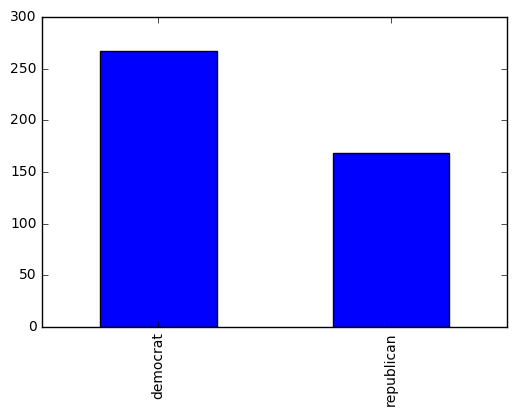

In [57]:
y.value_counts().plot(kind='bar');

In [58]:
def dem_pred(n):
    """Predict democrats with 'n' samples"""
    np.random.seed(444)
    x_inp = np.array(np.random.randint(0, 2, (n,len(X.columns))))
    y_act = ['democrat' for x in list(range(x_inp.shape[0]))]
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)
    y_pred = knn.predict(x_inp)
    return accuracy_score(y_act, y_pred)

In [59]:
def rep_pred(n):
    """Predict democrats with 'n' samples"""
    np.random.seed(444)
    x_inp = np.array(np.random.randint(0, 2, (n,len(X.columns))))
    y_act = ['republican' for x in list(range(x_inp.shape[0]))]
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)
    y_pred = knn.predict(x_inp)
    return accuracy_score(y_act, y_pred)

In [60]:
def votes_pred(k):
    "Prediction accuracy with 'k' nearest neighbors"
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

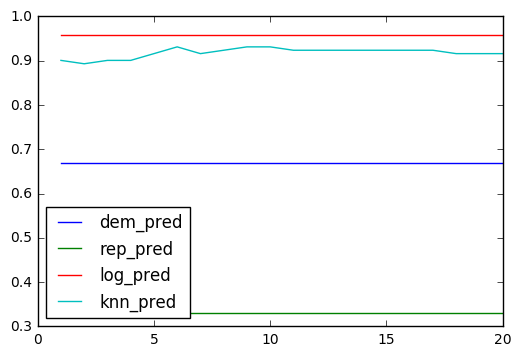

In [61]:
plt.plot(list(range(1,21)), [dem_pred(100) for i in list(range(1,21))], label="dem_pred")
plt.plot(list(range(1,21)), [rep_pred(100) for i in list(range(1,21))], label="rep_pred")
plt.plot(list(range(1,21)), [log_acc for i in list(range(1,21))], label="log_pred")
plt.plot(list(range(1,21)), [votes_pred(i) for i in list(range(1,21))], label="knn_pred")
plt.legend(loc=0)
plt.show()

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [62]:
curv = learning_curve(logreg, X, y)

In [63]:
# Plot it
train_cv_err = np.mean(curv[1], axis=1)
test_cv_err = np.mean(curv[2], axis=1)

In [64]:
learning_curve(logreg, X, y)

(array([ 29,  94, 159, 224, 290]),
 array([[ 1.        ,  0.96551724,  0.96551724],
        [ 0.9893617 ,  0.9787234 ,  0.9787234 ],
        [ 0.98113208,  0.97484277,  0.97484277],
        [ 0.98214286,  0.97321429,  0.98214286],
        [ 0.96896552,  0.96551724,  0.97241379]]),
 array([[ 0.97241379,  0.89655172,  0.88965517],
        [ 0.97241379,  0.91724138,  0.89655172],
        [ 0.97241379,  0.93103448,  0.91724138],
        [ 0.97241379,  0.95172414,  0.93103448],
        [ 0.97931034,  0.96551724,  0.93793103]]))

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```

In [65]:
# Gaussian Naive Bayes

gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_pred_gauss = gauss.predict(X_test)
accuracy_score(y_test, y_pred_gauss)

0.93893129770992367

In [66]:
cross_val_score(gauss, X, y, cv=10, scoring='accuracy').mean()

0.93977398570421822

In [67]:
# SVM Classifier

svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.95419847328244278

In [68]:
cross_val_score(svm, X, y, cv=10, scoring='accuracy').mean()

0.95828047921071191

In [69]:
# Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.94656488549618323

In [70]:
cross_val_score(tree, X, y, cv=10, scoring='accuracy').mean()

0.93534178999295281

In [71]:
# Random Forests

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_for = forest.predict(X_test)
accuracy_score(y_test, y_pred_for)

0.96183206106870234

In [72]:
cross_val_score(forest, X, y, cv=10, scoring='accuracy').mean()

0.95606563978657011

**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

**See above**

**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [107]:
df_votes2 = pd.read_csv('data/house-votes-84.data', header=None)

In [113]:
df_votes2.replace({'y':1, 'n':0, '?':np.nan}, inplace=True)
df_votes2.fillna(df_votes.mode().iloc[0], inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
vy = df_votes2.iloc[:,16]
vX = df_votes2.iloc[:,1:16]

In [139]:
logreg = LogisticRegression()
logreg.fit(vX, vy)
logreg.predict([1,1,1,0,0,0,1,1,1,0,0,0,0,0,1])

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [140]:
cross_val_score(LogisticRegression(), vX, vy, cv=10)

array([ 0.8       ,  0.86666667,  0.86363636,  0.8372093 ,  0.8372093 ,
        0.8372093 ,  0.86046512,  0.88372093,  0.74418605,  0.79069767])

**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [176]:
mv = pd.read_csv('data/2013_movies.csv')
mv.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [179]:
rating_counts = mv.groupby('Rating').count()['Title']

In [180]:
rating_counts.values

array([ 1, 15, 47, 37])

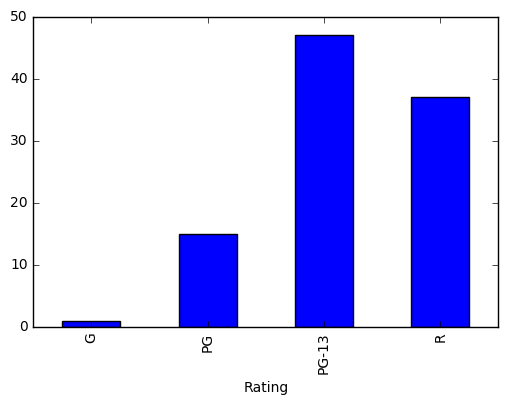

In [160]:
rating_counts.plot(kind='bar');

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

In [163]:
rating_counts.values

array([ 1, 15, 47, 37])

In [169]:
rating_dums = pd.get_dummies(mv[['Rating']], drop_first=True)

In [170]:
rating_dums

,PG,PG-13,R
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [181]:
model_mv = mv[['Rating','Budget','DomesticTotalGross','Runtime']].dropna()

In [183]:
x = model_mv[['Budget','DomesticTotalGross','Runtime']]
y = model_mv['Rating']

In [198]:
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg.fit(x, y)
log_acc = cross_val_score(logreg, x, y, cv=10).mean()
log_acc

//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/optimize.py:200: UserWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm d

0.52161616161616153

In [189]:
accuracy = []

for k in range(1,50):
    accuracy.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), x, y, cv=10)))

In [197]:
knn_acc = max(accuracy)
knn_acc

0.57681818181818179

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

In [194]:
pg13 = ['PG-13' for x in y]

In [199]:
stupid_acc = accuracy_score(y, pg13)
stupid_acc

0.4606741573033708

In [202]:
print("Log Accuracy Delta:", log_acc-stupid_acc)
print("KNN Accuracy Delta:", knn_acc-stupid_acc)

Log Accuracy Delta: 0.0609420043128
KNN Accuracy Delta: 0.116144024515


In [203]:
logreg.coef_

array([[  9.08218734e-09,   1.94813394e-09,  -1.28616299e-02],
       [  8.60860132e-09,  -1.03413833e-09,   4.89908083e-04],
       [ -1.76895852e-08,  -9.12492696e-10,   1.23717218e-02]])

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

In [206]:
hab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [208]:
hab.columns = ['age','yr','nodes','survived5']
hab.head()

,age,yr,nodes,survived5
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [209]:
hab['age'].mean()

52.45751633986928

In [211]:
hab['age'].std()

10.80345234930328

In [212]:
hab.groupby('survived5')['age'].mean()[1]

52.017777777777781

In [213]:
hab.groupby('survived5')['age'].std()[1]

11.012154179929528

In [214]:
hab.groupby('survived5')['age'].mean()[2]

53.679012345679013

In [216]:
hab.groupby('survived5')['age'].std()[2]

10.167137208297401

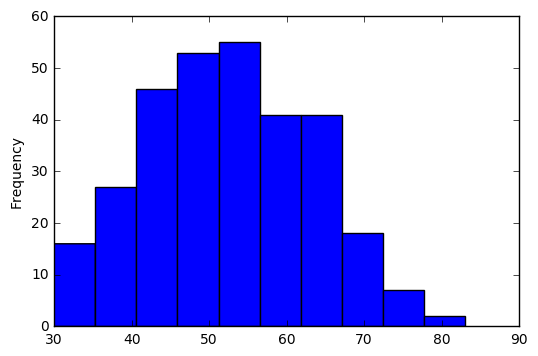

In [218]:
hab.age.plot.hist();

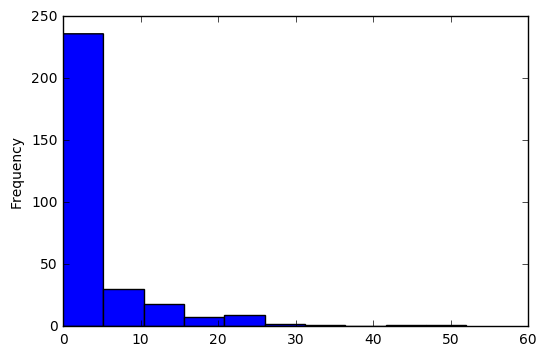

In [219]:
hab.nodes.plot.hist();

In [224]:
hab['yr'].min()

58

In [225]:
hab['yr'].max()

69

In [226]:
y = hab['survived5']
X = hab[['age','yr','nodes']]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [228]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_predicted = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_test_predicted)
lr_accuracy

0.81521739130434778

In [229]:
lr.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [230]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y)

In [231]:
m

array([ 20,  66, 112, 158, 204])

In [232]:
train_cv_err = 1- np.mean(train_err, axis=1)
test_cv_err = 1- np.mean(test_err, axis=1)

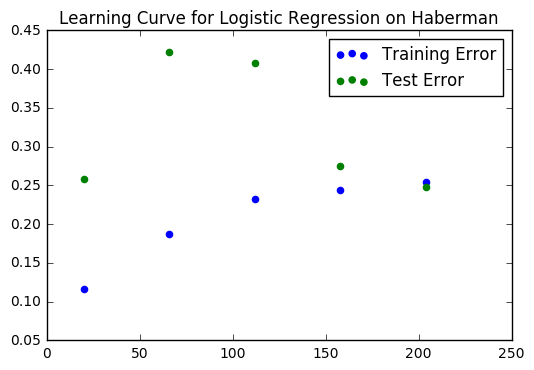

In [233]:
plt.scatter(m, train_cv_err, color='b', label='Training Error')
plt.scatter(m, test_cv_err, color='g', label='Test Error')
plt.title('Learning Curve for Logistic Regression on Haberman')
plt.legend();